In [1]:
import pandas as pd
import requests
from selenium import webdriver
from selenium.webdriver.support.ui import Select
import numpy as np
import re
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
from xgboost import plot_importance
from xgboost import plot_tree
import graphviz
from xgboost import DMatrix
import time
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [2]:
browser =  webdriver.Chrome(executable_path = '/opt/homebrew/bin/chromedriver') # You'll need to download drivers from link above
#browser.implicitly_wait(10) # probably unnecessary, just makes sure all pages you visit fully load


/var/folders/95/q06718vx3nd9m5683mchd0380000gn/T/ipykernel_60620/2767767744.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser =  webdriver.Chrome(executable_path = '/opt/homebrew/bin/chromedriver') # You'll need to download drivers from link above


In [3]:
def scrape_stats(url):
    browser.get(url)
    time.sleep(7.5)
    select = Select(browser.find_element_by_class_name('stats-table-pagination__select'))
    select.select_by_visible_text('All')
    data = pd.read_html(browser.page_source)
    data[0] = data[0].replace('-', np.nan)
    data[0].dropna(axis = 1, how = 'all', inplace = True)
    data[0].dropna(axis = 0, how = 'any', inplace = True)
    if isinstance(data[0].columns, pd.MultiIndex):
        data[0].columns = data[0].columns.droplevel([1, 2, 3, 4])
        data[0].columns = data[0].columns.map(' '.join)
        data[0] = data[0].rename(columns=lambda x: re.sub('Unnamed: ._level_0','',x))
    data[0].columns = data[0].columns.str.replace(' ', '')
    data[0].columns = data[0].columns.str.replace(chr(160), '')
    data[0].columns = data[0].columns.str.upper()
    data[0].columns = data[0].columns.str.lstrip()
    return data

In [4]:
# data = scrape_stats("https://www.nba.com/stats/players/speed-distance/")
# data[0]

In [5]:
#data = scrape_stats("https://www.nba.com/stats/players/shooting/")
#data[0]

In [6]:
#data = scrape_stats("https://www.nba.com/stats/players/traditional/")
#data[0]

In [7]:
# data = scrape_stats("https://www.nba.com/stats/players/hustle/")
# data[0]

In [8]:
#data = scrape_stats("https://www.nba.com/stats/players/passing/?sort=AST_ADJ&dir=1")
#data[0]

In [9]:
#data[0]

In [10]:
# toScrape = ["https://www.nba.com/stats/players/speed-distance/", 
#  "https://www.nba.com/stats/players/shooting/", 
#  "https://www.nba.com/stats/players/traditional/",
#  "https://www.nba.com/stats/players/hustle/",
#  "https://www.nba.com/stats/players/passing/?sort=AST_ADJ&dir=1"]

In [11]:
year = 21

In [12]:
toScrape = ["https://www.nba.com/stats/players/speed-distance/?Season=20{0}-{1}&SeasonType=Regular%20Season", 
 "https://www.nba.com/stats/players/shooting/?Season=20{0}-{1}&SeasonType=Regular%20Season", 
 "https://www.nba.com/stats/players/traditional/?Season=20{0}-{1}&SeasonType=Regular%20Season",
 "https://www.nba.com/stats/players/hustle/?Season=20{0}-{1}&SeasonType=Regular%20Season",
 "https://www.nba.com/stats/players/passing/?Season=20{0}-{1}&SeasonType=Regular%20Season"]

toScrape = [i.format(str(year).zfill(2), str(year+1).zfill(2)) for i in toScrape]

In [13]:
toScrape

['https://www.nba.com/stats/players/speed-distance/?Season=2021-22&SeasonType=Regular%20Season',
 'https://www.nba.com/stats/players/shooting/?Season=2021-22&SeasonType=Regular%20Season',
 'https://www.nba.com/stats/players/traditional/?Season=2021-22&SeasonType=Regular%20Season',
 'https://www.nba.com/stats/players/hustle/?Season=2021-22&SeasonType=Regular%20Season',
 'https://www.nba.com/stats/players/passing/?Season=2021-22&SeasonType=Regular%20Season']

In [14]:
for i, url in enumerate(toScrape): 
    print(url)
    stats = scrape_stats(url)
    stats[0]
    print(stats[0])
    if i == 0:
        data = stats[0]
    else:
        data = pd.merge(data, stats[0], how="left", left_on=["PLAYER"], right_on=["PLAYER"])

https://www.nba.com/stats/players/speed-distance/?Season=2021-22&SeasonType=Regular%20Season


/var/folders/95/q06718vx3nd9m5683mchd0380000gn/T/ipykernel_60620/1827007998.py:4: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  select = Select(browser.find_element_by_class_name('stats-table-pagination__select'))


              PLAYER TEAM  GP   W   L   MIN  DIST.FEET  DIST.MILES  \
0       Aaron Gordon  DEN  75  46  29  31.7    11717.0        2.22   
1        Aaron Henry  PHI   6   6   0   2.8     1203.2        0.23   
2      Aaron Holiday  PHX  63  34  29  16.2     6371.2        1.21   
3      Aaron Nesmith  BOS  52  32  20  11.0     4439.1        0.84   
4      Aaron Wiggins  OKC  50  13  37  24.2    10189.7        1.93   
..               ...  ...  ..  ..  ..   ...        ...         ...   
600      Zach LaVine  CHI  67  37  30  34.8    13467.4        2.55   
601   Zavier Simpson  OKC   4   1   3  43.5    16604.0        3.14   
602       Zeke Nnaji  DEN  41  24  17  17.0     6938.3        1.31   
603  Ziaire Williams  MEM  61  40  21  21.7     8287.1        1.57   
604   Zylan Cheatham  UTA   1   0   1   5.2     2207.0        0.42   

     DIST.MILESOFF  DIST.MILESDEF  AVGSPEED  AVGSPEEDOFF  AVGSPEEDDEF  
0             1.18           1.04      4.00         4.19         3.81  
1             0

/var/folders/95/q06718vx3nd9m5683mchd0380000gn/T/ipykernel_60620/1827007998.py:4: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  select = Select(browser.find_element_by_class_name('stats-table-pagination__select'))


              PLAYER TEAM  AGE LESSTHAN5FT.FGM LESSTHAN5FT.FGA  \
0       Aaron Gordon  DEN   26             3.8             5.3   
1        Aaron Henry  PHI   22             0.2             0.2   
2      Aaron Holiday  PHX   25             0.9             1.6   
3      Aaron Nesmith  BOS   22             0.5             0.7   
4      Aaron Wiggins  OKC   23             1.7             2.8   
..               ...  ...  ...             ...             ...   
600      Zach LaVine  CHI   27             3.8             5.6   
601   Zavier Simpson  OKC   25             2.8             5.8   
602       Zeke Nnaji  DEN   21             1.3             2.0   
603  Ziaire Williams  MEM   20             1.1             1.5   
604   Zylan Cheatham  UTA   26             0.0             1.0   

    LESSTHAN5FT.FG% 5-9FT.FGM 5-9FT.FGA 5-9FT.FG% 10-14FT.FGM  ...  \
0              71.4       0.3       0.9      35.4         0.3  ...   
1               100       0.0       0.2       0.0         0.0  ... 

/var/folders/95/q06718vx3nd9m5683mchd0380000gn/T/ipykernel_60620/1827007998.py:4: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  select = Select(browser.find_element_by_class_name('stats-table-pagination__select'))


     UNNAMED:0                 PLAYER TEAM  AGE  GP   W   L   MIN   PTS   FGM  \
0            1            Joel Embiid  PHI   28  68  45  23  33.8  30.6   9.8   
1            2           LeBron James  LAL   37  56  25  31  37.2  30.3  11.4   
2            3  Giannis Antetokounmpo  MIL   27  67  45  22  32.9  29.9  10.3   
3            4           Kevin Durant  BKN   33  55  36  19  37.2  29.9  10.5   
4            5            Luka Doncic  DAL   23  65  44  21  35.4  28.4   9.9   
..         ...                    ...  ...  ...  ..  ..  ..   ...   ...   ...   
600        582            Nate Hinton  IND   22   2   0   2   1.2   0.0   0.0   
601        582             Sam Dekker  TOR   28   1   1   0   0.9   0.0   0.0   
602        582         Trayvon Palmer  DET   27   1   0   1  16.8   0.0   0.0   
603        582             Tyler Hall  NYK   25   1   1   0   1.9   0.0   0.0   
604        582         Zylan Cheatham  UTA   26   1   0   1   5.2   0.0   0.0   

     ...   REB  AST  TOV  S

/var/folders/95/q06718vx3nd9m5683mchd0380000gn/T/ipykernel_60620/1827007998.py:4: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  select = Select(browser.find_element_by_class_name('stats-table-pagination__select'))


              PLAYER TEAM  AGE  GP   MIN  SCREENASSISTS  SCREENASSISTSPTS  \
0       Aaron Gordon  DEN   26  75  31.7            0.7               1.7   
1        Aaron Henry  PHI   22   6   2.8            0.0               0.0   
2      Aaron Holiday  PHX   25  63  16.2            0.1               0.3   
3      Aaron Nesmith  BOS   22  52  11.0            0.1               0.2   
4      Aaron Wiggins  OKC   23  50  24.2            0.3               0.6   
..               ...  ...  ...  ..   ...            ...               ...   
600      Zach LaVine  CHI   27  67  34.7            0.5               0.9   
601   Zavier Simpson  OKC   25   4  43.5            0.0               0.0   
602       Zeke Nnaji  DEN   21  41  17.0            0.9               2.4   
603  Ziaire Williams  MEM   20  62  21.7            0.1               0.2   
604   Zylan Cheatham  UTA   26   1   5.2            0.0               0.0   

     DEFLECTIONS  OFFLOOSEBALLSRECOVERED  DEFLOOSEBALLSRECOVERED  \
0      

/var/folders/95/q06718vx3nd9m5683mchd0380000gn/T/ipykernel_60620/1368857448.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'TEAM_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = pd.merge(data, stats[0], how="left", left_on=["PLAYER"], right_on=["PLAYER"])
/var/folders/95/q06718vx3nd9m5683mchd0380000gn/T/ipykernel_60620/1827007998.py:4: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  select = Select(browser.find_element_by_class_name('stats-table-pagination__select'))


              PLAYER TEAM  GP   W   L   MIN  PASSESMADE  PASSESRECEIVED  AST  \
0       Aaron Gordon  DEN  75  46  29  31.7        26.9            30.4  2.5   
1        Aaron Henry  PHI   6   6   0   2.8         1.2             1.8  0.0   
2      Aaron Holiday  PHX  63  34  29  16.2        23.5            25.8  2.4   
3      Aaron Nesmith  BOS  52  32  20  11.0        10.9             8.3  0.4   
4      Aaron Wiggins  OKC  50  13  37  24.2        16.1            17.7  1.4   
..               ...  ...  ..  ..  ..   ...         ...             ...  ...   
600      Zach LaVine  CHI  67  37  30  34.7        36.7            48.4  4.5   
601   Zavier Simpson  OKC   4   1   3  43.5        93.8            98.8  7.5   
602       Zeke Nnaji  DEN  41  24  17  17.0        11.9            10.2  0.4   
603  Ziaire Williams  MEM  61  40  21  21.7        11.7            14.7  1.1   
604   Zylan Cheatham  UTA   1   0   1   5.2         3.0             4.0  0.0   

     SECONDARYAST  POTENTIALAST  ASTPTS

/var/folders/95/q06718vx3nd9m5683mchd0380000gn/T/ipykernel_60620/1368857448.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'MIN_x', 'GP_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = pd.merge(data, stats[0], how="left", left_on=["PLAYER"], right_on=["PLAYER"])


In [15]:
#stats[0].columns.values[0] = stats[0].columns.values[0].replace(' ', '')
#stats[0].columns = stats[0].columns.str.upper()


In [16]:
data.columns

Index(['PLAYER', 'TEAM_x', 'GP_x', 'W_x', 'L_x', 'MIN_x', 'DIST.FEET',
       'DIST.MILES', 'DIST.MILESOFF', 'DIST.MILESDEF', 'AVGSPEED',
       'AVGSPEEDOFF', 'AVGSPEEDDEF', 'TEAM_y', 'AGE_x', 'LESSTHAN5FT.FGM',
       'LESSTHAN5FT.FGA', 'LESSTHAN5FT.FG%', '5-9FT.FGM', '5-9FT.FGA',
       '5-9FT.FG%', '10-14FT.FGM', '10-14FT.FGA', '10-14FT.FG%', '15-19FT.FGM',
       '15-19FT.FGA', '15-19FT.FG%', '20-24FT.FGM', '20-24FT.FGA',
       '20-24FT.FG%', '25-29FT.FGM', '25-29FT.FGA', '25-29FT.FG%', 'UNNAMED:0',
       'TEAM_x', 'AGE_y', 'GP_y', 'W_y', 'L_y', 'MIN_y', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST_x', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-', 'TEAM_y',
       'AGE', 'GP_x', 'MIN_x', 'SCREENASSISTS', 'SCREENASSISTSPTS',
       'DEFLECTIONS', 'OFFLOOSEBALLSRECOVERED', 'DEFLOOSEBALLSRECOVERED',
       'LOOSEBALLSRECOVERED', '%LOOSEBALLSRECOVEREDOFF',
       '%LOOSEBALLSRECOVEREDDEF', 'CHARGESDRAWN', 'CO

In [17]:
stats[0].columns

Index(['PLAYER', 'TEAM', 'GP', 'W', 'L', 'MIN', 'PASSESMADE', 'PASSESRECEIVED',
       'AST', 'SECONDARYAST', 'POTENTIALAST', 'ASTPTSCREATED.1', 'ASTADJ',
       'ASTTOPASS%', 'ASTTOPASS%ADJ'],
      dtype='object')

In [18]:
data.rename(columns={'MIN_x':'MIN'}, inplace=True)
data.rename(columns={'GP_x':'GP'}, inplace=True)
data.drop(list(data.filter(regex = '_[xy]')), axis = 1, inplace = True)
data = data.loc[:,~data.columns.duplicated()]

In [19]:
data.columns

Index(['PLAYER', 'GP', 'MIN', 'DIST.FEET', 'DIST.MILES', 'DIST.MILESOFF',
       'DIST.MILESDEF', 'AVGSPEED', 'AVGSPEEDOFF', 'AVGSPEEDDEF',
       'LESSTHAN5FT.FGM', 'LESSTHAN5FT.FGA', 'LESSTHAN5FT.FG%', '5-9FT.FGM',
       '5-9FT.FGA', '5-9FT.FG%', '10-14FT.FGM', '10-14FT.FGA', '10-14FT.FG%',
       '15-19FT.FGM', '15-19FT.FGA', '15-19FT.FG%', '20-24FT.FGM',
       '20-24FT.FGA', '20-24FT.FG%', '25-29FT.FGM', '25-29FT.FGA',
       '25-29FT.FG%', 'UNNAMED:0', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'TOV', 'STL', 'BLK',
       'PF', 'FP', 'DD2', 'TD3', '+/-', 'AGE', 'SCREENASSISTS',
       'SCREENASSISTSPTS', 'DEFLECTIONS', 'OFFLOOSEBALLSRECOVERED',
       'DEFLOOSEBALLSRECOVERED', 'LOOSEBALLSRECOVERED',
       '%LOOSEBALLSRECOVEREDOFF', '%LOOSEBALLSRECOVEREDDEF', 'CHARGESDRAWN',
       'CONTESTED2PTSHOTS', 'CONTESTED3PTSHOTS', 'CONTESTEDSHOTS', 'TEAM', 'W',
       'L', 'PASSESMADE', 'PASSESRECEIVED', 'SECONDARYAST', 'POTENTIAL

In [20]:
data

,PLAYER,GP,MIN,DIST.FEET,DIST.MILES,DIST.MILESOFF,DIST.MILESDEF,AVGSPEED,AVGSPEEDOFF,AVGSPEEDDEF,...,W,L,PASSESMADE,PASSESRECEIVED,SECONDARYAST,POTENTIALAST,ASTPTSCREATED.1,ASTADJ,ASTTOPASS%,ASTTOPASS%ADJ
0,Aaron Gordon,75,31.7,11717.0,2.22,1.18,1.04,4.00,4.19,3.81,...,46,29,26.9,30.4,0.5,4.4,6.1,3.2,9.3,11.8
1,Aaron Henry,6,2.8,1203.2,0.23,0.12,0.11,4.39,4.23,3.91,...,6,0,1.2,1.8,0.0,0.2,0.3,0.2,0.0,14.3
2,Aaron Holiday,63,16.2,6371.2,1.21,0.64,0.57,4.28,4.48,4.09,...,34,29,23.5,25.8,0.4,4.8,6.3,3.0,10.3,13.0
3,Aaron Nesmith,52,11.0,4439.1,0.84,0.44,0.40,4.34,4.58,4.12,...,32,20,10.9,8.3,0.1,0.9,0.9,0.5,3.9,4.6
4,Aaron Wiggins,50,24.2,10189.7,1.93,1.01,0.92,4.59,4.96,4.24,...,13,37,16.1,17.7,0.1,2.6,3.4,1.5,8.4,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,Zach LaVine,67,34.8,13467.4,2.55,1.38,1.17,4.21,4.61,3.82,...,37,30,36.7,48.4,0.7,8.8,11.2,5.7,12.3,15.5
601,Zavier Simpson,4,43.5,16604.0,3.14,1.75,1.39,4.10,4.41,3.77,...,1,3,93.8,98.8,0.8,16.0,20.5,9.3,8.0,9.9
602,Zeke Nnaji,41,17.0,6938.3,1.31,0.71,0.61,4.30,4.52,4.07,...,24,17,11.9,10.2,0.1,0.8,1.2,0.5,3.5,4.3
603,Ziaire Williams,61,21.7,8287.1,1.57,0.82,0.75,4.15,4.28,4.01,...,40,21,11.7,14.7,0.2,1.8,2.8,1.4,9.1,11.6


In [21]:
stat = 'AVGSPEEDOFF'
data[['PLAYER', 'MIN',stat]].sort_values(stat, ascending=False).head(50)

,PLAYER,MIN,AVGSPEEDOFF
26,Anthony Lamb,3.8,5.83
438,Nate Hinton,1.2,5.59
463,Paris Bass,5.5,5.52
303,Jordan Goodwin,3.0,5.44
163,Doug McDermott,24.0,5.35
604,Zylan Cheatham,5.2,5.34
554,Trayvon Palmer,16.8,5.27
489,Rob Edwards,5.4,5.26
282,Jemerrio Jones,7.4,5.25
513,Sekou Doumbouya,8.2,5.22


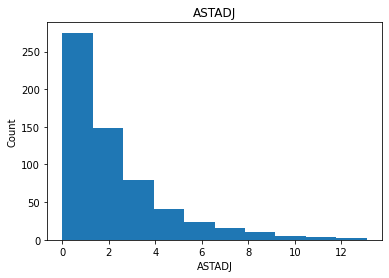

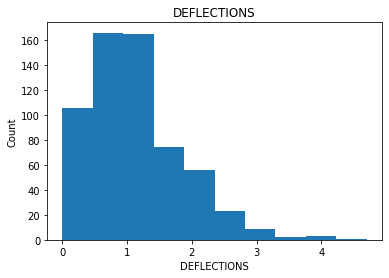

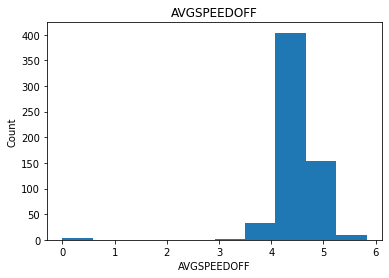

In [22]:
for item in ["ASTADJ", "DEFLECTIONS", "AVGSPEEDOFF"]:
    if data[item].dtypes != 'O':
        data.hist(item, grid=False)
        pyplot.xlabel(item)
        pyplot.ylabel("Count")
        pyplot.savefig("{}_raw.png".format(item))

In [23]:
info = ['PLAYER', 'MIN', 'GP']
features = ['OREB', 'DREB', 'REB', 'LESSTHAN5FT.FGM',  '10-14FT.FGM', '15-19FT.FGM', '20-24FT.FGM',
            'STL', 'BLK', 'ASTADJ', 'PASSESMADE', 'LOOSEBALLSRECOVERED', 'DEFLECTIONS', 'CONTESTED2PTSHOTS',
            'CONTESTED3PTSHOTS', '3PM', 'SCREENASSISTS', 'AGE']

other = ['AVGSPEED', 'AVGSPEEDOFF', 'AVGSPEEDDEF']

In [24]:
data_norm = data.copy()

In [25]:
stat = "ASTADJ"
data[["PLAYER", stat]].sort_values(by=[stat], ascending = False).head(15).style.format({stat: "{:20,.2f}", "TOTALMIN": "{:20,.1f}"}).set_properties(**{'text-align': 'right'}).set_properties( subset=['PLAYER', stat], **{'font-weight': 'bold'} ).hide_index().background_gradient(cmap='Reds',subset=stat)

/var/folders/95/q06718vx3nd9m5683mchd0380000gn/T/ipykernel_60620/3095415893.py:2: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  data[["PLAYER", stat]].sort_values(by=[stat], ascending = False).head(15).style.format({stat: "{:20,.2f}", "TOTALMIN": "{:20,.1f}"}).set_properties(**{'text-align': 'right'}).set_properties( subset=['PLAYER', stat], **{'font-weight': 'bold'} ).hide_index().background_gradient(cmap='Reds',subset=stat)


PLAYER,ASTADJ
Chris Paul,13.10
James Harden,12.40
Trae Young,11.60
Darius Garland,10.90
Luka Doncic,10.80
Dejounte Murray,10.80
Damian Lillard,9.60
Nikola Jokic,9.60
Tyrese Haliburton,9.60
LaMelo Ball,9.50


In [26]:
data_norm[features] = data_norm[features].apply(pd.to_numeric, errors='coerce')
data_norm[features] = data_norm[features].div(data['MIN'], axis=0) * 36
data_norm[features] = data_norm[features].apply(lambda x: np.log(x + 1))

In [27]:
data_norm = data_norm.dropna()
data_norm['TOTALMIN'] = data_norm['MIN'] * data['GP']
data_norm = data_norm[data_norm['TOTALMIN'] > 350]

In [28]:
data_norm

,PLAYER,GP,MIN,DIST.FEET,DIST.MILES,DIST.MILESOFF,DIST.MILESDEF,AVGSPEED,AVGSPEEDOFF,AVGSPEEDDEF,...,L,PASSESMADE,PASSESRECEIVED,SECONDARYAST,POTENTIALAST,ASTPTSCREATED.1,ASTADJ,ASTTOPASS%,ASTTOPASS%ADJ,TOTALMIN
0,Aaron Gordon,75,31.7,11717.0,2.22,1.18,1.04,4.00,4.19,3.81,...,29,3.451539,30.4,0.5,4.4,6.1,1.533435,9.3,11.8,2377.5
2,Aaron Holiday,63,16.2,6371.2,1.21,0.64,0.57,4.28,4.48,4.09,...,29,3.974476,25.8,0.4,4.8,6.3,2.036882,10.3,13.0,1020.6
3,Aaron Nesmith,52,11.0,4439.1,0.84,0.44,0.40,4.34,4.58,4.12,...,20,3.602033,8.3,0.1,0.9,0.9,0.969401,3.9,4.6,572.0
4,Aaron Wiggins,50,24.2,10189.7,1.93,1.01,0.92,4.59,4.96,4.24,...,37,3.216890,17.7,0.1,2.6,3.4,1.172917,8.4,9.6,1210.0
7,Admiral Schofield,38,12.3,5012.9,0.95,0.51,0.44,4.32,4.56,4.08,...,28,3.784744,9.7,0.0,1.3,1.8,1.206409,4.5,5.2,467.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,Yuta Watanabe,38,11.7,5009.7,0.95,0.51,0.44,4.54,4.94,4.14,...,17,3.542074,9.6,0.1,1.2,1.4,1.148623,5.1,6.0,444.6
599,Zach Collins,28,17.9,6935.1,1.31,0.70,0.61,4.11,4.43,3.80,...,14,3.851336,20.2,0.1,3.5,5.3,1.829224,9.5,11.2,501.2
600,Zach LaVine,67,34.8,13467.4,2.55,1.38,1.17,4.21,4.61,3.82,...,30,3.662677,48.4,0.7,8.8,11.2,1.931022,12.3,15.5,2331.6
602,Zeke Nnaji,41,17.0,6938.3,1.31,0.71,0.61,4.30,4.52,4.07,...,17,3.265759,10.2,0.1,0.8,1.2,0.722135,3.5,4.3,697.0


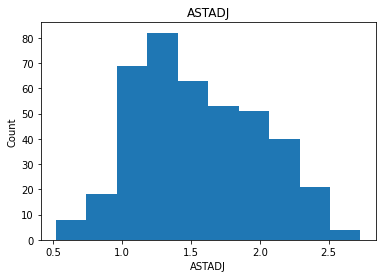

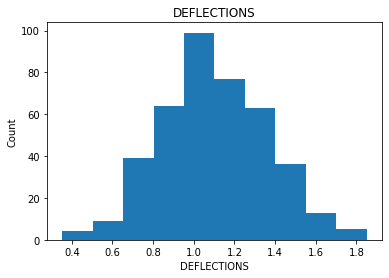

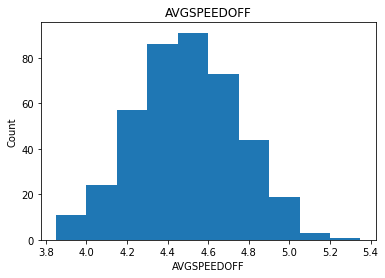

In [29]:

 
for item in ['ASTADJ', 'DEFLECTIONS', 'AVGSPEEDOFF']:
    if data_norm[item].dtypes != 'O':
        data_norm.hist(item, grid=False)
        pl.xlabel(item)
        pl.ylabel("Count")
        plt.savefig("{}.png".format(item))


In [30]:
stat = 'DEFLECTIONS'
data_norm[['PLAYER', 'TOTALMIN',stat]].sort_values(stat, ascending=False).head(15).style.format({"2021-22": "${:20,.0f}", "TOTALMIN": "{:20,.1f}"}).set_properties(**{'text-align': 'right'}).set_properties( subset=['PLAYER', stat], **{'font-weight': 'bold'} ).hide_index().background_gradient(cmap='Reds',subset=stat)

/var/folders/95/q06718vx3nd9m5683mchd0380000gn/T/ipykernel_60620/2683858685.py:2: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  data_norm[['PLAYER', 'TOTALMIN',stat]].sort_values(stat, ascending=False).head(15).style.format({"2021-22": "${:20,.0f}", "TOTALMIN": "{:20,.1f}"}).set_properties(**{'text-align': 'right'}).set_properties( subset=['PLAYER', stat], **{'font-weight': 'bold'} ).hide_index().background_gradient(cmap='Reds',subset=stat)


PLAYER,TOTALMIN,DEFLECTIONS
Matisse Thybulle,"1,683.0",1.850768
Gary Payton II,"1,232.0",1.810522
Jose Alvarado,821.5,1.730799
Dennis Smith Jr.,640.1,1.718837
Nerlens Noel,562.5,1.701105
Jordan McLaughlin,899.0,1.699089
De'Anthony Melton,"1,634.4",1.693876
Alex Caruso,"1,148.0",1.681094
Dejounte Murray,"2,366.4",1.636650
Robert Covington,"1,938.3",1.626868


In [53]:
sal_df = pd.read_excel('2022salaries.xlsx', header = 1)
sal_df = sal_df.drop_duplicates(subset = "Player", keep = "first")
sal_df = sal_df.dropna(subset=['2021-22'])
sal_df['Player'] = sal_df['Player'].str.split('\\').str[0]
sal_df = sal_df[~((sal_df["Signed Using"].str.contains("Pick", na=False)) & (sal_df["2021-22"] < 12632950.0))]
sal_df = sal_df[['Player', '2021-22']]

In [32]:
# url = "https://hoopshype.com/salaries/players/20{0}-20{1}/"

# url = url.format(str(year).zfill(2), str(year+1).zfill(2))
# browser.get(url)
# #select = Select(browser.find_element_by_class_name('stats-table-pagination__select'))
# #select.select_by_visible_text('All')
# col = '20{0}/{1}'.format(str(year).zfill(2), str(year+1).zfill(2))
# sal_df = pd.read_html(browser.page_source)[0]
# sal_df = sal_df.reset_index()
# sal_df = sal_df.drop_duplicates(subset = "Player", keep = "first")
# sal_df = sal_df.dropna(subset=[col])
# sal_df['Player'] = sal_df['Player'].str.split('\\').str[0]
# #sal_df = sal_df[~((sal_df["Signed Using"].str.contains("Pick", na=False)) & (sal_df['20{0}/{1}'.format(str(year).zfill(2), str(year+1).zfill(2))] < 12632950.0))]
# sal_df = sal_df[['Player', col]]
# sal_df

In [33]:
full_data = pd.merge(data_norm, sal_df, left_on=["PLAYER"], right_on=['Player'])

In [55]:
# full_data[col] = full_data[col].str.replace(',', '')
# full_data[col] = full_data[col].str.replace('$', '')
# full_data[col] = full_data[col].astype(int)
upper = 12000000
lower = 0
full_data = full_data[~((full_data['2021-22'] <= upper) & (full_data['2021-22'] >= lower) & (full_data["AGE"] <= 24))]
full_data['2021-22'] = full_data['2021-22'].clip(upper = 35000000)

/var/folders/95/q06718vx3nd9m5683mchd0380000gn/T/ipykernel_60620/1514617447.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data['2021-22'] = full_data['2021-22'].clip(upper = 35000000)


In [56]:
full_data

,PLAYER,GP,MIN,DIST.FEET,DIST.MILES,DIST.MILESOFF,DIST.MILESDEF,AVGSPEED,AVGSPEEDOFF,AVGSPEEDDEF,...,PASSESRECEIVED,SECONDARYAST,POTENTIALAST,ASTPTSCREATED.1,ASTADJ,ASTTOPASS%,ASTTOPASS%ADJ,TOTALMIN,Player,2021-22
0,Aaron Gordon,75,31.7,11717.0,2.22,1.18,1.04,4.00,4.19,3.81,...,30.4,0.5,4.4,6.1,1.533435,9.3,11.8,2377.5,Aaron Gordon,16409091.0
1,Al Horford,68,29.0,10608.1,2.01,1.08,0.93,3.95,4.24,3.67,...,31.0,0.4,5.6,8.6,1.806591,8.7,10.4,1972.0,Al Horford,27000000.0
7,Andrew Wiggins,72,31.9,12167.5,2.30,1.22,1.08,4.06,4.40,3.74,...,34.4,0.5,4.7,6.0,1.478322,7.8,10.4,2296.8,Andrew Wiggins,31579390.0
8,Anthony Davis,40,35.1,12273.6,2.32,1.19,1.13,3.73,3.85,3.61,...,44.9,0.4,6.0,8.2,1.567547,6.8,8.3,1404.0,Anthony Davis,35000000.0
15,Bam Adebayo,56,32.6,12445.1,2.36,1.27,1.09,4.05,4.40,3.72,...,43.4,0.4,7.1,8.9,1.668979,7.6,8.8,1825.6,Bam Adebayo,28103550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,Thaddeus Young,52,16.3,6340.9,1.20,0.65,0.55,4.14,4.40,3.87,...,18.7,0.1,3.4,5.2,1.804964,8.4,9.8,847.6,Thaddeus Young,14190000.0
257,Tim Hardaway Jr.,42,29.6,11143.0,2.11,1.15,0.96,3.99,4.26,3.72,...,33.0,0.3,4.0,5.8,1.482832,7.2,9.2,1243.2,Tim Hardaway Jr.,21306816.0
258,Tobias Harris,73,34.8,12966.3,2.46,1.32,1.14,3.99,4.21,3.76,...,42.0,0.6,6.5,9.2,1.732571,7.6,9.9,2540.4,Tobias Harris,35000000.0
272,Will Barton,71,32.1,12185.3,2.31,1.24,1.07,4.11,4.35,3.86,...,41.5,0.6,6.6,10.0,1.871083,10.4,13.1,2279.1,Will Barton,15384615.0


In [36]:
X, y = full_data[features+other], full_data["2021-22"]

In [37]:
data_dmatrix = DMatrix(data=X,label=y)

In [38]:
from xgboost import train
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
xg_reg = train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[02:22:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


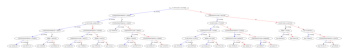

In [39]:
plot_tree(xg_reg,num_trees=0)
#pyplot.rcParams['figure.figsize'] = [100, 100]
pyplot.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

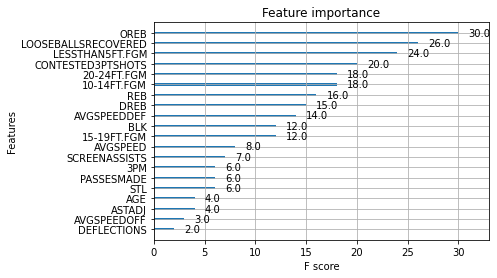

In [40]:
plot_importance(xg_reg, )

In [57]:
le = LabelEncoder()
y = le.fit_transform(y)

In [58]:
model = XGBClassifier()

In [59]:
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

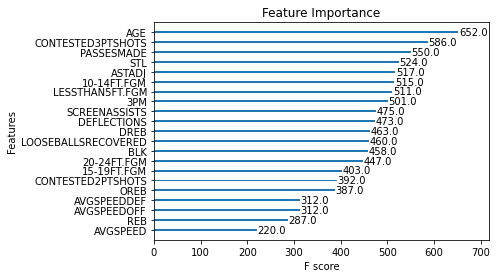

In [60]:
plot_importance(model, importance_type="weight", grid=False,title='Feature Importance')
#plot_importance(model, importance_type="weight", max_num_features=5, grid=False,title='Feature Importance')

#pyplot.rcParams['figure.figsize'] = [20, 20]

pyplot.show()

In [45]:
stat = 'AVGSPEED'
full_data[['PLAYER', 'TEAM', 'TOTALMIN',stat, '2021-22']].sort_values(stat, ascending=False).reset_index(drop=True).head(15).style.format({"2021-22": "${:20,.0f}", "TOTALMIN": "{:20,.1f}"}).set_properties(**{'text-align': 'right'}).set_properties( subset=['PLAYER', stat, '2021-22'], **{'font-weight': 'bold'} ).hide_index().background_gradient(cmap='Reds',subset='2021-22').bar(subset=[stat], color='#FFA07A')


/var/folders/95/q06718vx3nd9m5683mchd0380000gn/T/ipykernel_60620/1888996392.py:2: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  full_data[['PLAYER', 'TEAM', 'TOTALMIN',stat, '2021-22']].sort_values(stat, ascending=False).reset_index(drop=True).head(15).style.format({"2021-22": "${:20,.0f}", "TOTALMIN": "{:20,.1f}"}).set_properties(**{'text-align': 'right'}).set_properties( subset=['PLAYER', stat, '2021-22'], **{'font-weight': 'bold'} ).hide_index().background_gradient(cmap='Reds',subset='2021-22').bar(subset=[stat], color='#FFA07A')


PLAYER,TEAM,TOTALMIN,AVGSPEED,2021-22
Dalano Banton,TOR,697.6,4.660000,"$ 925,258"
Doug McDermott,SAS,"1,224.0",4.650000,"$ 13,750,000"
T.J. McConnell,IND,650.7,4.640000,"$ 7,500,000"
Matt Thomas,CHI,460.0,4.630000,"$ 1,669,178"
Jordan McLaughlin,MIN,899.0,4.580000,"$ 1,669,178"
Yuta Watanabe,TOR,444.6,4.540000,"$ 1,762,769"
Tre Jones,SAS,"1,145.4",4.540000,"$ 1,517,981"
Jarred Vanderbilt,MIN,"1,879.6",4.530000,"$ 4,259,259"
Svi Mykhailiuk,TOR,716.8,4.530000,"$ 1,729,217"
Markelle Fultz,ORL,360.0,4.520000,"$ 16,500,000"


In [46]:
avg_df = scrape_stats("https://www.nba.com/stats/players/shooting/?Season=2021-22&SeasonType=Regular%20Season&PerMode=Totals")

/var/folders/95/q06718vx3nd9m5683mchd0380000gn/T/ipykernel_60620/1827007998.py:4: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  select = Select(browser.find_element_by_class_name('stats-table-pagination__select'))


In [47]:
avg = avg_df[0].copy()
avg = avg.dropna()
avg = avg.apply(pd.to_numeric, errors='ignore')
avg = avg.append(avg.sum(numeric_only=True), ignore_index=True)

for item in avg.columns:
    if "%" in item:
        print(item)
        avg.iloc[-1, avg.columns.get_loc(item)] = avg.iloc[-1, avg.columns.get_loc(item)-2]/avg.iloc[-1, avg.columns.get_loc(item)-1]
avg.iloc[-1]

LESSTHAN5FT.FG%
5-9FT.FG%
10-14FT.FG%
15-19FT.FG%
20-24FT.FG%
25-29FT.FG%


/var/folders/95/q06718vx3nd9m5683mchd0380000gn/T/ipykernel_60620/927688712.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  avg = avg.append(avg.sum(numeric_only=True), ignore_index=True)


PLAYER                  NaN
TEAM                    NaN
AGE                 15359.0
LESSTHAN5FT.FGM     44276.0
LESSTHAN5FT.FGA     70172.0
LESSTHAN5FT.FG%    0.630964
5-9FT.FGM           10098.0
5-9FT.FGA           24222.0
5-9FT.FG%          0.416894
10-14FT.FGM          7469.0
10-14FT.FGA         17283.0
10-14FT.FG%        0.432159
15-19FT.FGM          6046.0
15-19FT.FGA         14556.0
15-19FT.FG%        0.415361
20-24FT.FGM         12945.0
20-24FT.FGA         34651.0
20-24FT.FG%        0.373582
25-29FT.FGM         18621.0
25-29FT.FGA         53631.0
25-29FT.FG%        0.347206
Name: 590, dtype: object

In [48]:
url = "https://hoopshype.com/salaries/players/2015-2016/"
browser.get(url)
#select = Select(browser.find_element_by_class_name('stats-table-pagination__select'))
#select.select_by_visible_text('All')
df = pd.read_html(browser.page_source)[0]
df = df . reset_index()
df

,index,Unnamed: 0,Player,2015/16,2015/16(*)
0,0,1.0,Kobe Bryant,"$25,000,000","$28,463,195"
1,1,2.0,LeBron James,"$22,970,500","$26,152,553"
2,2,3.0,Carmelo Anthony,"$22,875,000","$26,043,823"
3,3,4.0,Dwight Howard,"$22,359,364","$25,456,757"
4,4,5.0,Joe Johnson,"$22,309,344","$25,399,808"
...,...,...,...,...,...
495,495,496.0,JJ O'Brien,"$30,887","$35,165"
496,496,496.0,Thanasis Antetokounmpo,"$30,887","$35,165"
497,497,498.0,Nate Robinson,"$26,456","$30,120"
498,498,499.0,Dorell Wright,"$17,637","$20,080"


In [49]:
for year in range(21, 22):
    print(year)

21


In [50]:
shots = pd.DataFrame(columns=['DIST','FGM', 'FGA', 'FG%'])

In [51]:
df2 = {'DIST': "0-5 FT", 'FGM': 32492, 'FGA': 51954, 'FG%': 0.625399}
shots = shots.append(df2, ignore_index = True)
df2 = {'DIST': "5-9 FT", 'FGM': 7390, 'FGA': 17872, 'FG%': 0.413496}
shots = shots.append(df2, ignore_index = True)
df2 = {'DIST': "10-14 FT", 'FGM': 5600, 'FGA': 13031, 'FG%': 0.429744}
shots = shots.append(df2, ignore_index = True)
df2 = {'DIST': "15-19 FT", 'FGM': 4513, 'FGA': 10902, 'FG%': 0.413961}
shots = shots.append(df2, ignore_index = True)
df2 = {'DIST': "20-24 FT", 'FGM': 9552, 'FGA': 25698, 'FG%': 0.371702}
shots = shots.append(df2, ignore_index = True)
df2 = {'DIST': "25-29 FT", 'FGM': 13722, 'FGA': 40044, 'FG%': 0.342673}
shots = shots.append(df2, ignore_index = True)

/var/folders/95/q06718vx3nd9m5683mchd0380000gn/T/ipykernel_60620/2490005401.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(df2, ignore_index = True)
/var/folders/95/q06718vx3nd9m5683mchd0380000gn/T/ipykernel_60620/2490005401.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(df2, ignore_index = True)
/var/folders/95/q06718vx3nd9m5683mchd0380000gn/T/ipykernel_60620/2490005401.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(df2, ignore_index = True)
/var/folders/95/q06718vx3nd9m5683mchd0380000gn/T/ipykernel_60620/2490005401.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

In [52]:
shots.head(15).style.format().set_properties(**{'text-align': 'right'}).set_properties( subset=['DIST', 'FGM', 'FGA', 'FG%'], **{'font-weight': 'bold'} ).hide_index().background_gradient(cmap='Reds',subset=['FG%', 'FGM']).bar(subset=["FGA"], color='#FFA07A')

/var/folders/95/q06718vx3nd9m5683mchd0380000gn/T/ipykernel_60620/677465635.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  shots.head(15).style.format().set_properties(**{'text-align': 'right'}).set_properties( subset=['DIST', 'FGM', 'FGA', 'FG%'], **{'font-weight': 'bold'} ).hide_index().background_gradient(cmap='Reds',subset=['FG%', 'FGM']).bar(subset=["FGA"], color='#FFA07A')


DIST,FGM,FGA,FG%
0-5 FT,32492,51954,0.625399
5-9 FT,7390,17872,0.413496
10-14 FT,5600,13031,0.429744
15-19 FT,4513,10902,0.413961
20-24 FT,9552,25698,0.371702
25-29 FT,13722,40044,0.342673
